### Clean the Census data

The healthcare department wants to process the 2011 census data (Data/census2011.csv) to find some relevant information about their department.

However, there is a lot of information in the data that is not relevant and can be ignored.

There are differences in the nomenclature in different datasets so a uniform nomenclature needs to be found as well. New states and Union Territories have been formed at the time of analysis which has to be taken care of so that the data can be used with the data that was captured later.

It is also reported that some data is missing in the dataset. However, the values of some of these missing data can be found by using data from other fields. 

You have been given the responsibility to address these problems and create clean data that can be used later.


### Problem Statement 1: (Keep the relevant data)

The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.

We may need the following columns.

- State name
- District name
- Population
- Male
- Female
- Literate
- Male_Literate
- Female_Literate
- Rural_Households
- Urban_Households
- Households
- Age_Group_0_29
- Age_Group_30_49
- Age_Group_50
- Age not stated

Import the data to pandas and keep only the required columns. 

In [1]:
import pandas as pd
census_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/census_2011.csv", usecols=["State name", "District name", "Population", "Male", "Female", "Literate", "Male_Literate", "Female_Literate", "Rural_Households", "Urban_Households", "Households" ,"Age_Group_0_29", "Age_Group_30_49", "Age_Group_50", "Age not stated"])
# print(census_df.head())


### Problem Statement 2: (Rename the Column names)

For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 

- State name  to State/UT
- District name  to District
- Male_Literate to Literate_Male
- Female_Literate to Literate_Female
- Rural_Households  to Households_Rural
- Urban_ Households  to Households_Urban
- Age_Group_0_29 to Young_and_Adult
- Age_Group_30_49 to Middle_Aged
- Age_Group_50 to Senior_Citizen
- Age not stated to Age_Not_Stated


In [2]:
new_cols = {"State name":"State/UT",
"District name":"District",
"Male_Literate":"Literate_Male",
"Female_Literate":"Literate_Female",
"Rural_Households":"Households_Rural",
"Urban_Households":"Households_Urban",
"Age_Group_0_29":"Young_and_Adult",
"Age_Group_30_49":"Middle_Aged",
"Age_Group_50":"Senior_Citizen",
"Age not stated":"Age_Not_Stated"}

census_df.rename(columns = new_cols, inplace=True)
# print(census_df.head())


### Problem Statement 3: (Rename State/UT Names)

The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.

Examples: 
- Andaman and Nicobar Islands
- Arunachal Pradesh
- Bihar


In [3]:
# print(census_df["State/UT"].unique())
census_df["State/UT"] = census_df["State/UT"].str.title().str.replace(" And ", " and ")
# print(census_df["State/UT"].unique())

### Problem Statement 4: (New State/UT formation)

In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 



In [4]:
telangana_districts =  pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/Telangana.txt", header=None)
telangana_districts = telangana_districts.squeeze().values

cond = census_df["District"].isin(telangana_districts)

# census_df[cond]["State/UT"] = "Telangana"
census_df.loc[cond, "State/UT"]= "Telangana"
# print(census_df.loc[cond].head())

cond2 = census_df["District"].isin(["Leh", "Kargil"])
census_df.loc[cond2, "State/UT"]= "Laddakh"
# print(census_df.loc[cond2].head())

### Problem Statement 5: (Find and process Missing Data)

Find and store the percentage of data missing for each column.

Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

##### Hint:
- Population = Male + Female
- Literate = Literate_Male + Literate_Female
- Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated
- Households = Households_Rural + Households_Urban 

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 


In [5]:
p4_df = census_df.copy()

In [6]:
census_df = p4_df

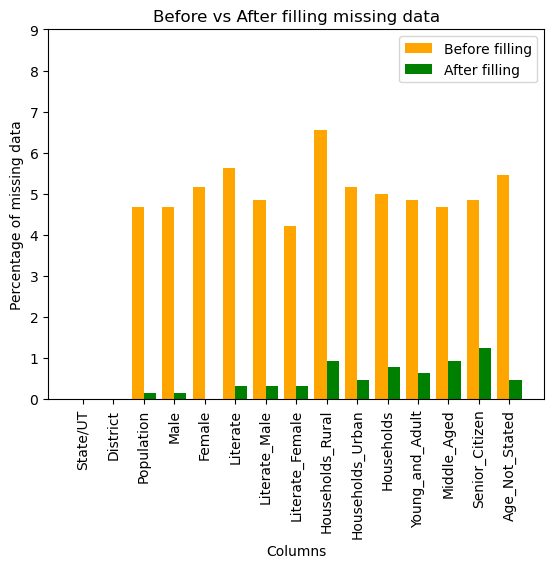

In [7]:
#data before filling
before_fill = dict(census_df.isna().sum())
x = pd.Series(before_fill)
total_vals = len(census_df)
before_fill_percentage = x * 100 / total_vals

#Population
census_df["Population"]=census_df["Population"].fillna(census_df["Male"] + census_df["Female"])
#Alternate
# census_df["Population"]=census_df["Population"].fillna(census_df["Young_and_Adult"]+census_df["Middle_Aged"]+census_df["Senior_Citizen"]+census_df["Age_Not_Stated"])

#Male and Female
census_df["Male"]=census_df["Male"].fillna(census_df["Population"] - census_df["Female"])
census_df["Female"]=census_df["Female"].fillna(census_df["Population"] - census_df["Male"])

#Literate
census_df["Literate"]=census_df["Literate"].fillna(census_df["Literate_Male"] + census_df["Literate_Female"])
census_df["Literate_Male"]=census_df["Literate_Male"].fillna(census_df["Literate"] - census_df["Literate_Female"])
census_df["Literate_Female"]=census_df["Literate_Female"].fillna(census_df["Literate"] - census_df["Literate_Male"])

#Households
census_df["Households"]=census_df["Households"].fillna(census_df["Households_Rural"] + census_df["Households_Urban"])
census_df["Households_Rural"]=census_df["Households_Rural"].fillna(census_df["Households"] - census_df["Households_Urban"])
census_df["Households_Urban"]=census_df["Households_Urban"].fillna(census_df["Households"] - census_df["Households_Rural"])

#Age groups
census_df["Population"] = census_df["Population"].fillna(census_df["Young_and_Adult"]+census_df["Middle_Aged"]+census_df["Senior_Citizen"]+census_df["Age_Not_Stated"])
census_df["Young_and_Adult"] = census_df["Young_and_Adult"].fillna(census_df["Population"]-census_df["Middle_Aged"]-census_df["Senior_Citizen"]-census_df["Age_Not_Stated"])
census_df["Middle_Aged"] = census_df["Middle_Aged"].fillna(census_df["Population"]-census_df["Young_and_Adult"]-census_df["Senior_Citizen"]-census_df["Age_Not_Stated"])
census_df["Senior_Citizen"] = census_df["Senior_Citizen"].fillna(census_df["Population"]-census_df["Young_and_Adult"]-census_df["Middle_Aged"]-census_df["Age_Not_Stated"])
census_df["Age_Not_Stated"] = census_df["Age_Not_Stated"].fillna(census_df["Population"]-census_df["Young_and_Adult"]-census_df["Senior_Citizen"]-census_df["Middle_Aged"])

#data after filling
after_fill = dict(census_df.isna().sum())
y = pd.Series(after_fill)
total_vals = len(census_df)
after_fill_percentage = y * 100 / total_vals

#Visualisation between before and after filling missing data
import numpy as np
import matplotlib.pyplot as plt

columns = before_fill_percentage.index
before_values = before_fill_percentage.values
after_values = after_fill_percentage.values

x_val = np.arange(len(columns))
x = columns
yB = before_values
yA = after_values

plt.bar(x_val - 0.2, yB, 0.4,color="Orange",label="Before filling")
plt.bar(x_val + 0.2, yA,0.4, color="Green", label="After filling")
plt.xticks(x_val, columns,rotation=90)
plt.yticks(np.arange(0,10))
plt.legend(loc=0)
plt.xlabel("Columns")
plt.ylabel("Percentage of missing data")
plt.title("Before vs After filling missing data")
plt.show()

In [8]:
p5df = census_df.copy()
# p5df.head()

### Problem Statement 6: (Save Data)
    
Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.


In [9]:
census_df.to_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/census.csv", index=None)

#### Extract Information from the housing data along with the census data

Siddhu, from Healthcare Department, has reported that the household data that they have (Data/housing.csv), requires some processing in the context of the census data so that more information can be extracted from it. 

Process the housing data and census data to gain some insight.
